In [508]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [509]:
# Reading the data.
house_price_data = pd.read_csv('/home/arjunshome/Learning/Machine Learning 2 Assignment/train.csv')
house_price_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [510]:
# Check data column information
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [511]:
# check the shape of the dataset
house_price_data.shape

(1460, 81)

In [512]:
house_price_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [513]:
# Checking for the null data in dataset
round(house_price_data.isnull().sum()/len(house_price_data.index), 2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
Functional      0.00
dtype: float64

In [514]:
# Considering 10 % as threshold and dropping the columns more than this threshold of 10%.
round(house_price_data.isnull().sum()/len(house_price_data.index), 2)[round(house_price_data.isnull().sum()/len(house_price_data.index), 2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [515]:
house_price_data = house_price_data.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis='columns')

In [516]:
# Checking the columns where 0-10% of missing values present
round(house_price_data.isnull().sum()/len(house_price_data.index),2)[round(house_price_data.isnull().sum()/
                                                                 len(house_price_data.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [517]:
# Now, we will try to convert the Year columns with the age 
# where we are going to fill these columns with numbers , 
# And if we query the max year for all these columns these will come out to be 2010 ,
# EX:- 
# suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

house_price_data['YearBuilt_Old'] = house_price_data.YearBuilt.max()-house_price_data.YearBuilt
house_price_data['YearRemodAdd_Old'] = house_price_data.YearRemodAdd.max()-house_price_data.YearRemodAdd
house_price_data['GarageYrBlt_Old'] = house_price_data.GarageYrBlt.max()-house_price_data.GarageYrBlt
house_price_data['YrSold_Old'] = house_price_data.YrSold.max()-house_price_data.YrSold

In [518]:
# Check the converted new columns
house_price_data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
100,1977,2001,1977.0,2010,33,9,33.0,0
603,2004,2005,2004.0,2010,6,5,6.0,0
380,1924,1950,1924.0,2010,86,60,86.0,0
144,1963,1963,1963.0,2006,47,47,47.0,4
1054,2002,2002,2002.0,2006,8,8,8.0,4


In [519]:
#  Dropping the actual year columns
house_price_data = house_price_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [520]:
# Filling the null or nan values.

house_price_data.MasVnrType.fillna('None',inplace=True)
house_price_data.MasVnrArea.fillna(house_price_data.MasVnrArea.mean(),inplace=True)
house_price_data.BsmtQual.fillna('TA',inplace=True)
house_price_data.BsmtCond.fillna('TA',inplace=True)
house_price_data.BsmtExposure.fillna('No',inplace=True)
house_price_data.BsmtFinType1.fillna('Unf',inplace=True)
house_price_data.BsmtFinType2.fillna('Unf',inplace=True)
house_price_data.GarageType.fillna('Attchd',inplace=True)
house_price_data.GarageYrBlt_Old.fillna(-1,inplace=True)
house_price_data.GarageFinish.fillna('Unf',inplace=True)
house_price_data.GarageQual.fillna('TA',inplace=True)
house_price_data.GarageCond.fillna('TA',inplace=True)

In [521]:
# These two columns have duplicates and hence lowest variants, hence dropping them along with ID column.
house_price_data.Street.value_counts()
house_price_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [522]:
house_price_data = house_price_data.drop(['Street','Utilities', 'Id'],axis='columns')

# EDA plotting.

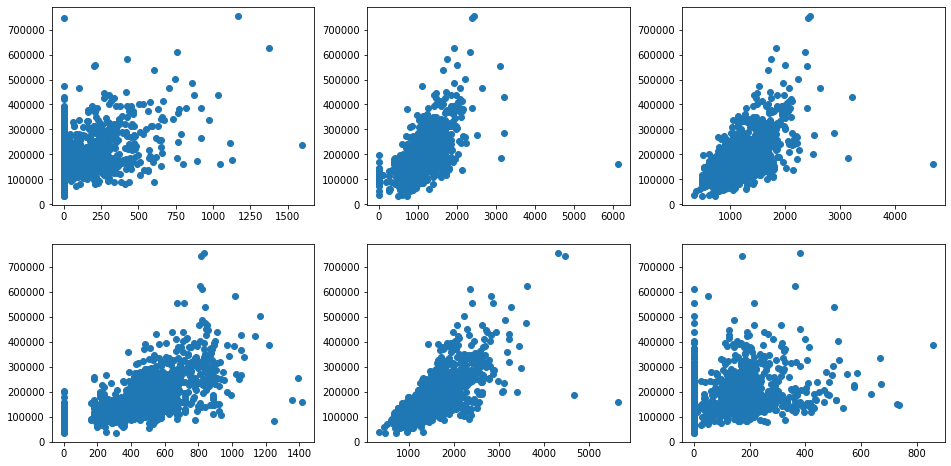

In [523]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_price_data.MasVnrArea,house_price_data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_price_data.TotalBsmtSF,house_price_data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_price_data['1stFlrSF'],house_price_data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_price_data['GarageArea'],house_price_data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_price_data['GrLivArea'],house_price_data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_price_data['WoodDeckSF'],house_price_data.SalePrice)

# We can see there are outliers present in the data.

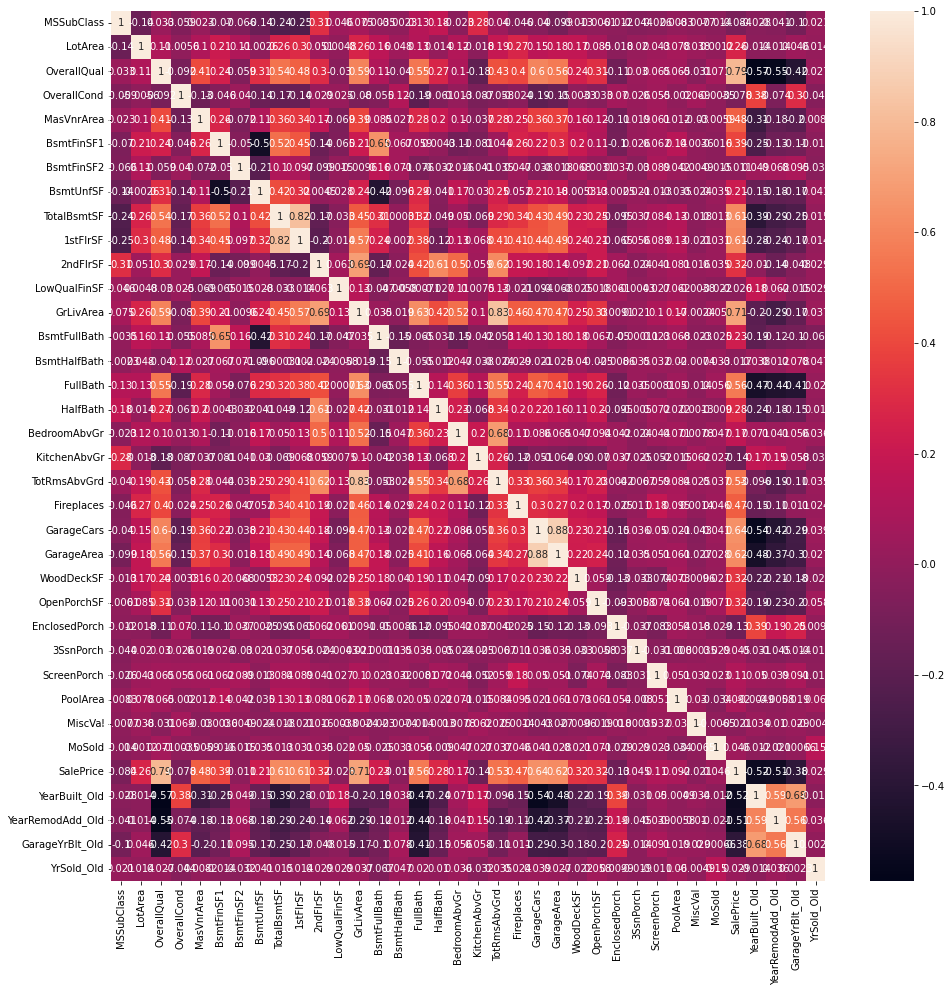

In [524]:
# Checking correlation of variables with heatmap.
plt.figure(figsize=(16,16))
sb.heatmap(house_price_data[list(house_price_data.dtypes[house_price_data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [525]:
# checking the shape before removing outliers
house_price_data.shape

(1460, 72)

In [526]:
# Function to remove outliers, by taking lower and upper quartile as 0.25 and 0.99.
cols = list(house_price_data.dtypes[house_price_data.dtypes !='object'].index)
cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']

def remove_outliers(x):
    list = []
    for col in cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

In [527]:
# Function call removing outliers.
house_price_data = remove_outliers(house_price_data)

In [528]:
# checking the shape after removing outliers.
house_price_data.shape

(1441, 72)

In [529]:
# Checking the data once more.
house_price_data.head(10)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10,10,10.0,2
5,50,RL,14115,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,0,700,10,WD,Normal,143000,17,15,17.0,1
6,20,RL,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,0,0,8,WD,Normal,307000,6,5,6.0,3
7,60,RL,10382,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,...,0,350,11,WD,Normal,200000,37,37,37.0,1
8,50,RM,6120,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,...,0,0,4,WD,Abnorml,129900,79,60,79.0,2
9,190,RL,7420,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,...,0,0,1,WD,Normal,118000,71,60,71.0,2


In [530]:
# Checking for categorical columns
house_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(10)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
5,Gtl,TA,Gd,TA,No,GLQ,Unf,Ex,Y,TA,Unf,TA,TA,TA,IR1
6,Gtl,Gd,Ex,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
7,Gtl,TA,Gd,TA,Mn,ALQ,BLQ,Ex,Y,TA,RFn,TA,TA,TA,IR1
8,Gtl,TA,TA,TA,No,Unf,Unf,Gd,Y,TA,Unf,Fa,TA,TA,Reg
9,Gtl,TA,TA,TA,No,GLQ,Unf,Ex,Y,TA,RFn,Gd,TA,TA,Reg


In [531]:
# Converting the columns from categories to ordinals.
house_price_data['LandSlope'] = house_price_data.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price_data['ExterQual'] = house_price_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['BsmtQual'] = house_price_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['BsmtCond'] = house_price_data.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['BsmtExposure'] = house_price_data.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price_data['BsmtFinType1'] = house_price_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price_data['BsmtFinType2'] = house_price_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_price_data['HeatingQC'] = house_price_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['CentralAir'] = house_price_data.CentralAir.map({'N':0,'Y':1})
house_price_data['KitchenQual'] = house_price_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['GarageFinish'] = house_price_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_price_data['GarageQual'] = house_price_data.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['GarageCond'] = house_price_data.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_price_data['ExterCond'] = house_price_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price_data['LotShape'] = house_price_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [532]:
house_price_data.head(10)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,2,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,3,Lvl,FR2,0,Veenker,Feedr,Norm,...,0,0,5,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,0,Lvl,Inside,0,CollgCr,Norm,Norm,...,0,0,9,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,0,Lvl,Corner,0,Crawfor,Norm,Norm,...,0,0,2,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,0,Lvl,FR2,0,NoRidge,Norm,Norm,...,0,0,12,WD,Normal,250000,10,10,10.0,2
5,50,RL,14115,0,Lvl,Inside,0,Mitchel,Norm,Norm,...,0,700,10,WD,Normal,143000,17,15,17.0,1
6,20,RL,10084,3,Lvl,Inside,0,Somerst,Norm,Norm,...,0,0,8,WD,Normal,307000,6,5,6.0,3
7,60,RL,10382,0,Lvl,Corner,0,NWAmes,PosN,Norm,...,0,350,11,WD,Normal,200000,37,37,37.0,1
8,50,RM,6120,3,Lvl,Inside,0,OldTown,Artery,Norm,...,0,0,4,WD,Abnorml,129900,79,60,79.0,2
9,190,RL,7420,3,Lvl,Corner,0,BrkSide,Artery,Artery,...,0,0,1,WD,Normal,118000,71,60,71.0,2


In [533]:
# Checking the converted data.
house_price_data[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(10)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0
5,0,2,4,3,1,6,1,4,1,2,1,3,3,2,0
6,0,3,5,3,3,6,1,4,1,3,2,3,3,2,3
7,0,2,4,3,2,5,4,4,1,2,2,3,3,2,0
8,0,2,3,3,1,1,1,3,1,2,1,2,3,2,3
9,0,2,3,3,1,6,1,4,1,2,2,4,3,2,3


In [534]:
# Creating dummy columns.
dummy_col = pd.get_dummies(house_price_data[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_price_data = pd.concat([house_price_data,dummy_col],axis='columns')

house_price_data = house_price_data.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [535]:
# Viewing the data after adding dummy columns.
house_price_data.head(10)

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,3,0,7,5,196.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,3,0,6,8,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,0,0,7,5,162.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,0,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,0,0,8,5,350.0,3,2,4,...,0,0,0,0,1,0,0,0,1,0
5,50,14115,0,0,5,5,0.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
6,20,10084,3,0,8,5,186.0,3,2,5,...,0,0,0,0,1,0,0,0,1,0
7,60,10382,0,0,7,6,240.0,2,2,4,...,0,0,0,0,1,0,0,0,1,0
8,50,6120,3,0,7,5,0.0,2,2,3,...,0,0,0,0,1,0,0,0,0,0
9,190,7420,3,0,5,6,0.0,2,2,3,...,0,0,0,0,1,0,0,0,1,0


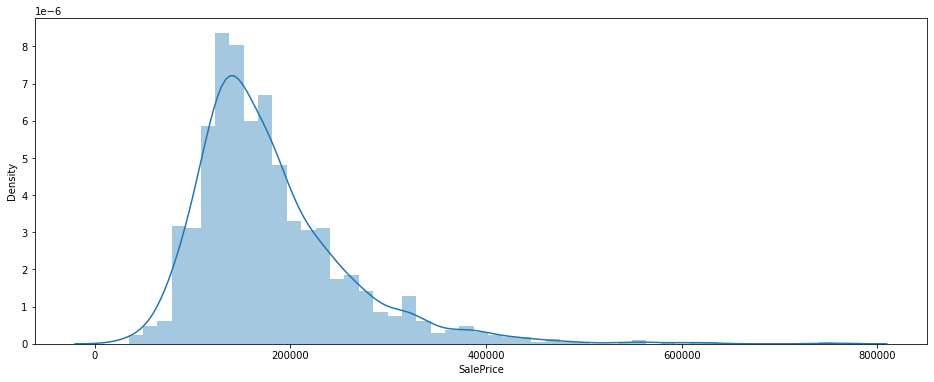

In [536]:
# Checking distribution of sales price
plt.figure(figsize=(16,6))
sb.distplot(house_price_data.SalePrice)
plt.show()

# Train Test Split

In [537]:
# df_train,df_test = train_test_split(house_price_data,train_size=0.7,test_size=0.3,random_state=42)
df_train,df_test = train_test_split(house_price_data,train_size=0.7,random_state=100)

In [538]:
df_train.shape

(1008, 194)

In [539]:
df_test.shape

(433, 194)

# Scaling the Dataset

In [540]:
cols = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])
df_test[cols] = scaler.transform(df_test[cols])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

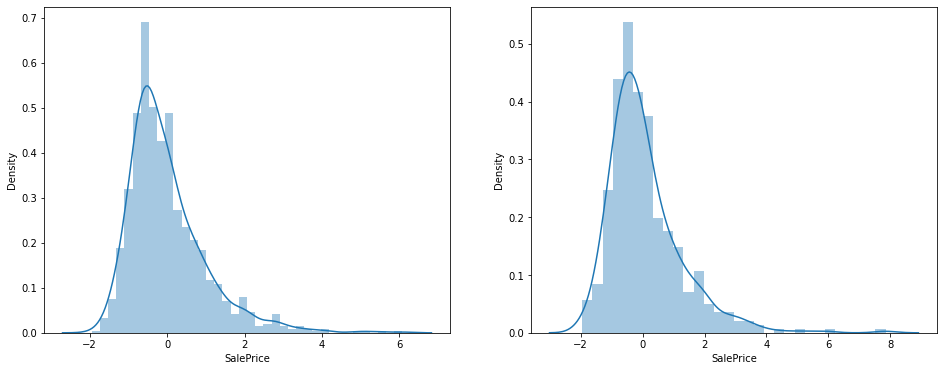

In [541]:
# Checking the Distribution after scaling

plt.figure(figsize=(16,6))
plt.subplot(121)
sb.distplot(df_train.SalePrice)
plt.subplot(122)
sb.distplot(df_test.SalePrice)

In [542]:
# Getting the X and y axis from both the train and test data.
y_train = df_train.pop('SalePrice') 
y_test = df_test.pop('SalePrice')

X_train = df_train
X_test = df_test

In [543]:
# Reshaping the y_train and y_test data
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# Building the Model

In [544]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Using RFE
rfe = RFE(lm, n_features_to_select=70)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [545]:
# Building the rfe score dataframe
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [546]:
# Checking the rfe scores
rfe_scores

,Column_Names,Status,Rank
0,MSSubClass,True,1
1,LotArea,True,1
2,LotShape,False,88
3,LandSlope,False,51
4,OverallQual,True,1
...,...,...,...
188,SaleCondition_AdjLand,False,4
189,SaleCondition_Alloca,False,68
190,SaleCondition_Family,False,98
191,SaleCondition_Normal,True,1


In [547]:
# Filtering only those columns whose status has been marked as true by rfe.
rfe_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [548]:
# Filtering the train and test set for rfe selected columns
X_train = X_train[rfe_columns]
X_test = X_test[rfe_columns]

# Checking with Lasso Regression Model

In [549]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9046899394377959
0.8360319486490885


In [550]:
# Using GridSearchView to improve our model with optimal value of Alpha.
folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [551]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.044259,0.014989,0.002703,0.000694,0.001,{'alpha': 0.001},0.869887,0.800748,0.883003,0.915466,...,0.905571,0.902447,0.905292,0.905519,0.903485,0.905050,0.906529,0.905021,0.905526,0.001803
1,0.006996,0.002349,0.002147,0.000041,0.010,{'alpha': 0.01},0.871638,0.775742,0.861505,0.880126,...,0.873701,0.869791,0.873005,0.874644,0.870395,0.870080,0.874130,0.869431,0.872495,0.002475
2,0.009810,0.003100,0.002247,0.000222,0.100,{'alpha': 0.1},0.820832,0.752314,0.853579,0.794643,...,0.808014,0.806617,0.808203,0.813249,0.802278,0.806806,0.805950,0.805916,0.808382,0.003766
3,0.006757,0.003896,0.002131,0.000057,1.000,{'alpha': 1.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003826,0.001529,0.002161,0.000117,5.000,{'alpha': 5.0},-0.025487,-0.018426,-0.000170,-0.007333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


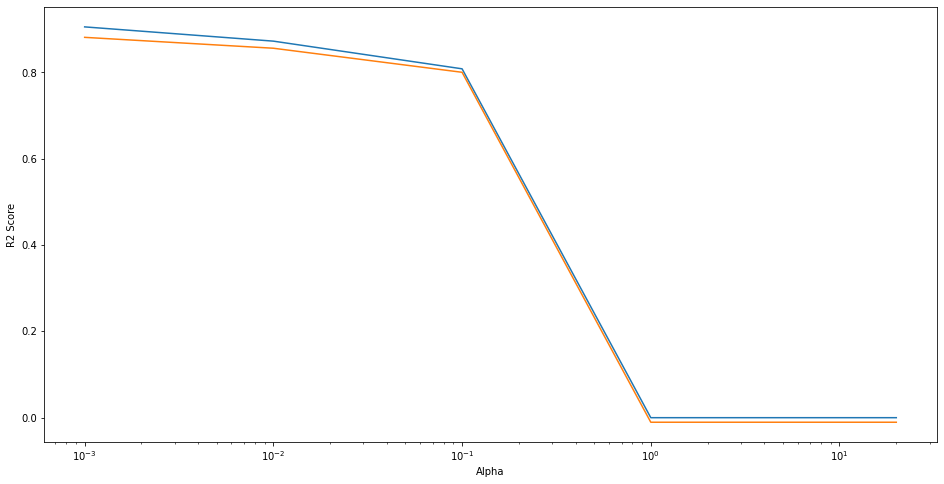

In [552]:
# Plotting the result
plt.figure(figsize=(16,8))
plt.plot(cv_result['param_alpha'],cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'],cv_result['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [553]:
# The best alpha value
model_cv.best_params_

{'alpha': 0.001}

In [554]:
# fitting with best alpha value
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9001394870709064
0.8353159828635723


In [555]:
# Vieweing the features and their coefficients
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
# lasso.coef_.shape

cols = df_train.columns
cols.insert(0,'const')

lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
28,BedroomAbvGr,0.429731
26,FullBath,0.366038
27,HalfBath,0.364992
13,BsmtFinSF1,0.361639
68,Neighborhood_Gilbert,0.30541
3,LandSlope,0.23306
24,BsmtFullBath,0.21988
63,Neighborhood_BrkSide,0.205931
64,Neighborhood_ClearCr,0.199896
16,BsmtUnfSF,0.199415


In [501]:
# Checking with Ridge Regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9109587589405357
0.8385683003211396


In [502]:
# We can see signs of overfitting from the above numbers, so using GridSearchView to optimize the alpha value for the model.
folds  = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [503]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.013120,0.005089,0.002426,0.000568,0.001,{'alpha': 0.001},0.861993,0.808233,0.874117,0.921605,...,0.912393,0.908416,0.910650,0.912424,0.910135,0.912214,0.913174,0.911944,0.911992,0.001783
1,0.008476,0.001011,0.002382,0.000547,0.010,{'alpha': 0.01},0.862098,0.808309,0.874250,0.921614,...,0.912392,0.908415,0.910650,0.912423,0.910134,0.912213,0.913173,0.911943,0.911991,0.001783
2,0.008416,0.000275,0.002184,0.000041,0.100,{'alpha': 0.1},0.863050,0.808906,0.875414,0.921673,...,0.912325,0.908358,0.910597,0.912355,0.910072,0.912112,0.913107,0.911859,0.911923,0.001780
3,0.008191,0.000634,0.002506,0.000463,0.200,{'alpha': 0.2},0.863955,0.809321,0.876457,0.921695,...,0.912179,0.908235,0.910483,0.912206,0.909939,0.911910,0.912966,0.911685,0.911778,0.001775
4,0.007131,0.001900,0.003765,0.000348,0.500,{'alpha': 0.5},0.866087,0.809862,0.878711,0.921643,...,0.911623,0.907760,0.910064,0.911633,0.909449,0.911223,0.912434,0.911063,0.911238,0.001754


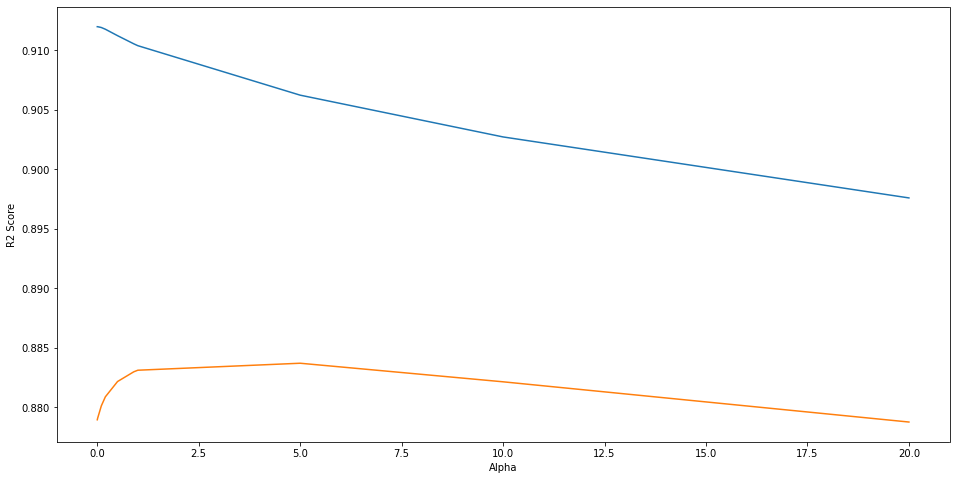

In [504]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [505]:
# Checking the alpha value
model_cv.best_params_

{'alpha': 5.0}

In [506]:
# Rebuilding the model based upon the above alpha value
ridge = Ridge(alpha=5.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.902590853725661
0.8332329166143456


In [507]:
# Viewing the features and their coefficients
model_parameter = list(ridge.coef_[0])
model_parameter.insert(0,ridge.intercept_)

cols = df_train.columns
cols.insert(0,'constant')

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
28,BedroomAbvGr,0.328708
27,HalfBath,0.311221
26,FullBath,0.299362
3,LandSlope,0.23226
63,Neighborhood_BrkSide,0.212607
24,BsmtFullBath,0.212187
13,BsmtFinSF1,0.208566
68,Neighborhood_Gilbert,0.198585
64,Neighborhood_ClearCr,0.19455
16,BsmtUnfSF,0.190599


We will consider lasso as our final model because it will penalize the model and also work on feature elimination.

In [452]:
# Final Model
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9046899394377959
0.8360319486490885


# Below are the features which explains the dataset best to predict.

In [ ]:
# BedroomAbvGr  -> Bedroom above Grade
# FullBath -> Full Bathroom
# HalfBath -> Half Baths
# BsmtFullBath -> Basement and full bathroom